In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
#Read the data
churndata = pd.read_csv('Customer-Churn.csv')
churndata.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [3]:
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [4]:
#transform Total Charges to numerical column
churndata['TotalCharges'] = pd.to_numeric(churndata['TotalCharges'],errors='coerce')

In [5]:
#Check for NaN values and deal with them 
churndata.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
churndata['TotalCharges'] = churndata['TotalCharges'].fillna(np.mean(churndata['TotalCharges']))

In [7]:
#Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges
X = churndata[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']]
y = churndata['Churn']

In [8]:
# transforming target to a binary value
#y.value_counts()

def target(x):
    if x == 'No':
        return 0
    else:
        return 1

y = y.apply(target)
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [9]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Scale values

#Scale X-train
transformer = StandardScaler().fit(X_train)
X_scaled_train = pd.DataFrame(transformer.transform(X_train),columns=X_train.columns)

#Scale X-test
X_scaled_test = pd.DataFrame(transformer.transform(X_test),columns=X_test.columns)
X_scaled_test

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,-1.284263,-0.436831,-1.327058,-1.001115
1,0.349957,-0.436831,-1.312127,-0.571868
2,0.799367,-0.436831,-1.507892,-0.556295
3,-1.284263,-0.436831,0.383397,-0.978342
4,1.412199,-0.436831,-0.472660,0.428150
...,...,...,...,...
2108,-1.284263,-0.436831,0.177678,-0.981081
2109,-1.284263,-0.436831,-0.668425,-0.992346
2110,1.126211,-0.436831,-0.142514,0.620034
2111,-0.508008,-0.436831,0.859537,-0.225121


In [11]:
# fit the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

accuracy: 0.7936583057264552
precision:  0.6825396825396826
recall:  0.44947735191637633
f1:  0.542016806722689


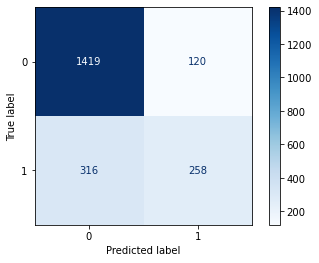

In [12]:
LR = LogisticRegression(random_state=42, solver='lbfgs', max_iter=4000).fit(X_scaled_train, y_train)
pred = LR.predict(X_scaled_test)

print('accuracy:', accuracy_score(y_test, pred))
print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

plot_confusion_matrix(LR, X_scaled_test, y_test,cmap=plt.cm.Blues)  
plt.show()

Accuracy of the model above is 79,3%, which would be pretty good if the data is balanced. However, when we take a closer look at the plotted confusion matrix, we can see there 316 people that are predicted NOT to churn but actually DO churn. This number is actually lower then the 258 customers we expect are going to churn and also actually churn. We wan't the falsely predict non-churners to be as low as possible as we are losing money here. With balancing the data we can adress this problem.

## Balancing the data

In [13]:
X = churndata[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']]
y = churndata['Churn']

In [14]:
def target(x):
    if x == 'No':
        return 0
    else:
        return 1

y = y.apply(target)
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

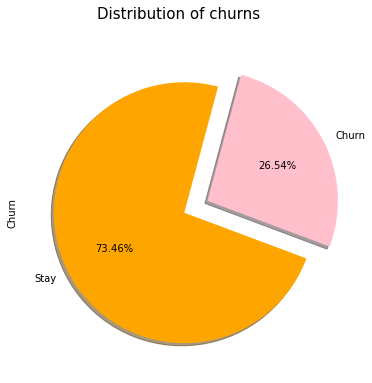

In [15]:
# let's have a look at distribution of the target variable
labels = 'Stay','Churn'
colors = ['orange', 'pink']

plt.figure(figsize=(6,6))
plt.suptitle('Distribution of churns', fontsize=15)

churndata['Churn'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.2f%%', shadow=True, colors=colors, 
                                             labels=labels, fontsize=10,startangle=75)

plt.show()



The plot above show that we have a considerable imbalance (Churns are only 26,54% of the dataset), it's not immense, but balancing is definetely advisable here. 

### Logistic Regression - Balanced Weights

accuracy: 0.7392333175579744
precision:  0.51357733175915
recall:  0.7578397212543554
f1:  0.6122448979591837


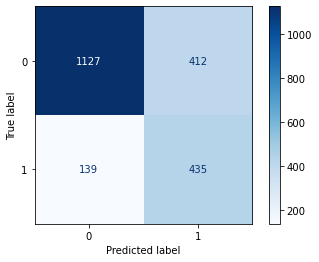

In [16]:
LR_balanced = LogisticRegression(random_state=42, solver='lbfgs', max_iter=4000,class_weight='balanced').fit(X_scaled_train, y_train)
pred_balanced = LR_balanced.predict(X_scaled_test)

print('accuracy:', accuracy_score(y_test, pred_balanced))
print("precision: ",precision_score(y_test,pred_balanced))
print("recall: ",recall_score(y_test,pred_balanced))
print("f1: ",f1_score(y_test,pred_balanced))

plot_confusion_matrix(LR_balanced, X_scaled_test, y_test,cmap=plt.cm.Blues)  
plt.show()

Using the logistic regression with balanced weights already improved our model a lot. We lost some accuracy, but the recall went up from 44% to 75%. As recall is an important measure, when you want to minimize the amount  of falsely predicted non-churners. We can see that this number went from 316 to only 139. However, it is important consider here that although we decreases that number by a lot we also increased the number of predited churns, when they actually don't. This could mean that we invest more money in people to 'retain' them, although they never planned on leaving. I don't see that as a really big problem in this situation, I reckon losing a customer would cost a company much more. Also, investing money in people who will not churn anyway, may result in higher customer loyalty which is never a bad thing. 

### Logistic Regession - Manual Weights

accuracy: 0.73450070989115
precision:  0.507361268403171
recall:  0.7804878048780488
f1:  0.6149622512010982


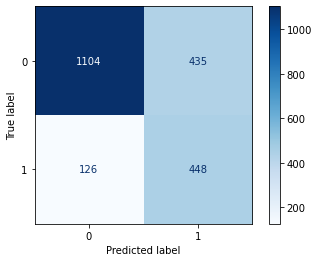

In [23]:
weight = {1: 0.75,
           0: 0.25
          }
LR_manual = LogisticRegression(random_state=1, solver='lbfgs', max_iter=4000,class_weight=weight).fit(X_scaled_train, y_train)
pred_manual = LR_manual.predict(X_scaled_test)

print('accuracy:', accuracy_score(y_test, pred_manual))
print("precision: ",precision_score(y_test,pred_manual))
print("recall: ",recall_score(y_test,pred_manual))
print("f1: ",f1_score(y_test,pred_manual))

plot_confusion_matrix(LR_manual, X_scaled_test, y_test,cmap=plt.cm.Blues)  
plt.show()

My favourite way of balancing data remains manual weights, as you can tweak your model until you get the perfect sweetspot of reducing the negative impact of falsely predicted outcomes. The recall of 78% shows this. 

### SMOTE

accuracy: 0.738760056791292
precision:  0.513126491646778
recall:  0.7491289198606271
f1:  0.6090651558073654


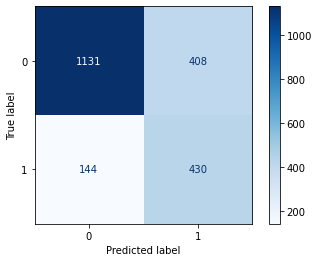

In [18]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_scaled_train,y_train)

smote = LogisticRegression(random_state=42,max_iter=1000).fit(X_train_SMOTE, y_train_SMOTE)
pred_smote = smote.predict(X_scaled_test)

print('accuracy:', accuracy_score(y_test, pred_smote))
print("precision: ",precision_score(y_test,pred_smote))
print("recall: ",recall_score(y_test,pred_smote))
print("f1: ",f1_score(y_test,pred_smote))

plot_confusion_matrix(smote, X_scaled_test, y_test,cmap=plt.cm.Blues)  
plt.show()

SMOTE preformed slightly less than balanced model. Given the recall is 74% vs. 75%.

### Undersampling

In [24]:
X_scaled_train = X_scaled_train.reset_index()
y_train = y_train.reset_index()
train = pd.concat([X_scaled_train, y_train],axis=1)
stay = train[train['Churn']==0]
churn = train[train['Churn']==1]

In [25]:
from sklearn.utils import resample
stay_undersampled = resample(stay,replace=False,n_samples = len(churn),random_state=42)


display(churn.shape)
display(stay_undersampled.shape)

(1295, 7)

(1295, 7)

In [26]:
train_undersampled = pd.concat([stay_undersampled,churn])

In [27]:
y_train_under = train_undersampled['Churn'].copy()
X_train_under = train_undersampled.drop('Churn',axis = 1).copy()

In [28]:
X_train_under

,index,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,index
1737,1737,-1.161696,-0.436831,-0.115970,-0.901893,5377
161,161,1.371344,-0.436831,0.854560,1.696411,1738
1130,1130,1.126211,-0.436831,0.177678,0.854283,4722
2097,2097,-0.998274,-0.436831,-0.159105,-0.796597,2555
3945,3945,1.575621,2.289215,1.148207,2.154661,1276
...,...,...,...,...,...,...
4917,4917,-1.284263,2.289215,0.385056,-0.978320,6231
4920,4920,0.676800,-0.436831,1.431900,1.326317,5334
4924,4924,-1.284263,-0.436831,-1.317104,-1.000983,3092
4925,4925,-1.284263,-0.436831,1.002213,-0.970103,3772


In [31]:
X_train_under = X_train_under.drop(['index'],axis=1)

accuracy: 0.7349739706578324
precision:  0.5080275229357798
recall:  0.7717770034843205
f1:  0.6127247579529738


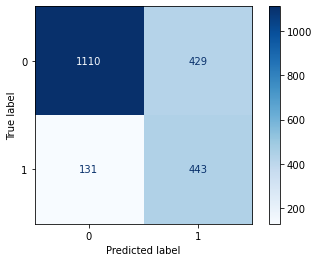

In [32]:
LR_under = LogisticRegression(max_iter=1000).fit(X_train_under, y_train_under)
pred_under = LR_under.predict(X_scaled_test)

print('accuracy:', accuracy_score(y_test, pred_under))
print("precision: ",precision_score(y_test,pred_under))
print("recall: ",recall_score(y_test,pred_under))
print("f1: ",f1_score(y_test,pred_under))

plot_confusion_matrix(LR_under, X_scaled_test, y_test,cmap=plt.cm.Blues)  
plt.show()

Undersampling is the second best scoring model with a recall of 77%. Since the differnces are very small either manual weights or undersampling is the way to go. 